### 3 Lab 2 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: can also write it yourself in numpy).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("bike_day_raw.csv")
X = data.drop("cnt", axis=1)
y = data.cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


data

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

reg_mod = LinearRegression().fit(X_train, y_train)
# using the linear regression model 
model = LinearRegression() 
  
# fitting the data 
model.fit(X_train, y_train) 
  
# predicting values 
y_pred = model.predict(X_train) 

df = pd.DataFrame({'Actual': y_train, 'Predicted': 
y_pred}) 

print(" X_train and y_train's model score is : ", reg_mod.score(X_train, y_train))
print(' residual sum of squares (RSS) is : '+ str(np.sum(np.square(df['Predicted'] - df['Actual']))))
print(' Mean Scquared error score is: ', mean_squared_error(y_train, y_pred))
print(' R^2 score is : ', reg_mod.score(X_test, y_test))



df
# ref: https://www.geeksforgeeks.org/how-to-calculate-residual-sum-of-squares-in-python/

 X_train and y_train's model score is :  0.5328925529498699
 residual sum of squares (RSS) is : 900680201.403496
 Mean Scquared error score is:  1643577.0098603943
 R^2 score is :  0.49910337568762697


,Actual,Predicted
452,5698,4400.704810
337,3485,4072.804896
509,6770,5229.952463
77,3117,3939.575316
451,5102,4420.384601
...,...,...
707,5582,3976.988352
192,4258,6645.264506
629,8167,5560.489133
559,7499,6924.675858


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [3]:
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()


diabetes_df = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
diabetes_df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

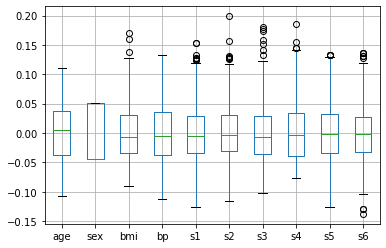

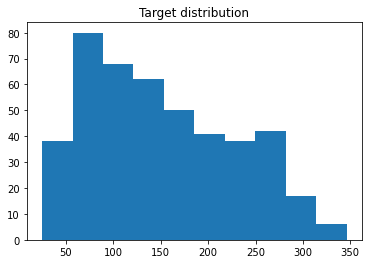

In [4]:
## Visualising the data for an outlier or the spread using graphical visualisations
import matplotlib.pyplot as plt

diabetes_df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes_dataset.target, bins="auto")

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score

X = diabetes_dataset.data

y= diabetes_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y)



Linear regression w/ scaling: 0.45981331849218154
Ridge regression w/ scaling: 0.46306135586304864


Text(0.5, 1.0, 'Ridge grid search')

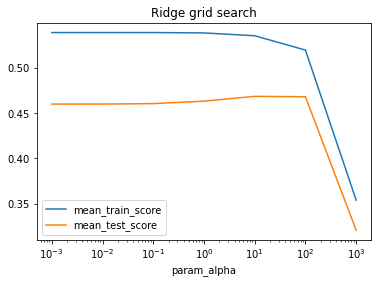

In [22]:
# With scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear regression w/ scaling:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge regression w/ scaling:", scores_ridge.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha",  ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")

In [31]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)


{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}


In [39]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 0.24.1.


In [41]:
from sklearn.linear_model import Lasso, Ridge

grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000.0, normalize=True),
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             return_train_score=True)

In [42]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1778279410038923}
0.46666241846111733


In [43]:
grid.score(X_test, y_test)

0.4471314214260469

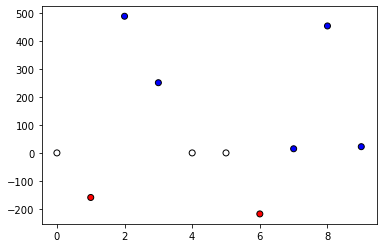

In [44]:
lasso = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
